<a href="https://colab.research.google.com/github/om-arya/matcha/blob/main/MATCHA_CSV_Data_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MATCHA🍵
### *Making Accessible Tools for Chart Accessibility*

We aim to make data visualizations more accessible for people who may not be able to see or easily interpret them. Since charts play a crucial role in understanding mathematical concepts, creating tools that can effectively summarize visual data for all users would be a significant step forward in inclusive data communication.

This notebook loads and cleans two open-source datasets we’ll use to test MATCHA’s accessibility-linting features.


| Dataset | Scope | Source | Retrieved |
|---------|-------|--------|-----------|
| **[student_habits_performance.csv](https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance)** | Study habits & exam scores (≈ 1 k students) | Kaggle · *Student Habits vs Academic Performance* | 3 Jun 2025 |
| **[ai_job_dataset.csv](https://www.kaggle.com/datasets/bismasajjad/global-ai-job-market-and-salary-trends-2025/data)** | Global AI-job titles, salaries, locations | Kaggle · *Global AI Job Market & Salary Trends 2025* | 3 Jun 2025 |


These datasets let us generate a mix of scatter, bar, box, and line charts. Which is perfect for checking font size, legend clarity, colour contrast, and dense-plot warnings.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
from google.colab import files
uploaded = files.upload()

Saving ai_job_dataset.csv to ai_job_dataset.csv


In [3]:
from google.colab import files
uploaded = files.upload()

Saving student_habits_performance.csv to student_habits_performance.csv


In [17]:
df = pd.read_csv('ai_job_dataset.csv')
df1 = pd.read_csv('student_habits_performance.csv')

## Data Cleaning 🧹

To ensure good data we are cleaning each CSV before we plot is more than housekeeping. Ut lets the Redesign Assistant (and our screen-reader users) work with reliable, uncluttered visuals.

* **Remove duplicates / redundant columns**  
  Prevents accidental double-counting and keeps legends, labels, and tooltips from ballooning with noise.

* **Handle missing values**  
  Explicitly dropping or imputing `NaN`s stops Matplotlib from silently casting numeric columns to text, which would break axes and mislead screen-reader summaries.

* **Outliers**  
  Isolating extreme points keeps autoscaling sensible; otherwise one giant salary or exam score could squash the rest of the data and hide patterns that matter to users.

* **Slimmer payload, faster plots**  
  Leaner DataFrames mean quicker rendering—important when we generate intentional “bad” plots to test the assistant’s linting speed.

A clean dataset → cleaner code → clearer, more accessible charts.

We are viewing the interaction between the years of experience and someones salary from this AI Job dataset.

In [18]:
# Select variables of interest
df_clean = df[["years_experience", "salary_usd"]]
df1_clean = df1[["sleep_hours", "exam_score"]]

# Check for NA values
print("Missing values in df_clean:\n", df_clean.isna().sum())
print("\nMissing values in df1_clean:\n", df1_clean.isna().sum())

# Drop missing values only (we are keeping outliers on purpose)
df_clean = df_clean.dropna()
df1_clean = df1_clean.dropna()

# Check for duplicated rows
print("\nDuplicated rows in df_clean:", df_clean.duplicated().sum())
print("Duplicated rows in df1_clean:", df1_clean.duplicated().sum())

# Drop duplicates (to avoid repetition in visual storytelling)
df_clean = df_clean.drop_duplicates()
df1_clean = df1_clean.drop_duplicates()

Missing values in df_clean:
 years_experience    0
salary_usd          0
dtype: int64

Missing values in df1_clean:
 sleep_hours    0
exam_score     0
dtype: int64

Duplicated rows in df_clean: 106
Duplicated rows in df1_clean: 39


## Creating Graphs 📈

We developed a checklist of accessibility rules to evaluate whether a data visualization supports inclusive understanding. These rules were adapted from a combination of peer-reviewed research and the official WCAG accessibility guidelines. In this notebook, we present two graphs: one designed to follow every rule, and another that intentionally omits some features to test our Redesign Assistant’s ability to flag accessibility issues.

Here are our accessibility rules:

**Minimum Figure Size**  
Figure size should be at least (8, 5) or larger. Prevents overcrowding and ensures labels/titles are legible even when zoomed or magnified.  
*WCAG Reference: 1.4.4 – Resize Text* (content must remain functional when zoomed to 200%).

**Minimum Font Size**  
All text elements (titles, axis labels, tick labels, legends) must use a font size ≥ 15 pt. Supports screen magnifiers, reduces visual strain, and aids in text-to-speech or braille rendering.  
*WCAG References: 1.4.3 – Contrast (4.5:1) and 1.4.4 – Resize Text*

**Descriptive Labels**  
Avoid empty or generic titles and axes (e.g., "x", "y", or "Series 1"). Clear labeling helps both users and LLMs understand the chart’s purpose.  
*WCAG 1.1.1 – Non-text Content* (ensures all elements are meaningfully labeled).

**Clear Legends for Multiple Series**  
When visualizing multiple datasets, use descriptive legends—not defaults. Legends help distinguish groups, especially when color alone isn’t sufficient.  
*WCAG 1.4.1 – Use of Color* (don't rely solely on color to convey meaning).

**Avoid Overlapping Text or High Data Density**  
Too many points or overlapping labels can make graphs unreadable. Downsampling or aggregating helps maintain clarity.  
*WCAG 1.4.4 – Resize Text and 1.4.10 – Reflow* (preserve readability at all zoom levels).

**High Color Contrast**  
Colors used must pass contrast checks. Users with visual impairments benefit from clear visual separation.  
*WCAG 1.4.3 – Text Contrast ≥ 4.5:1; 1.4.11 – Non-Text Contrast ≥ 3:1*

**Avoid Animations or Blinking**  
Avoid flashing or animated content that can disorient users or cause seizures.  
*WCAG 2.3.1 – Three Flashes* (no element should flash more than 3 times per second).

**Additional Guidelines**  
Use semantically meaningful titles, and default to bottom-left axes unless another layout is clearly justified.

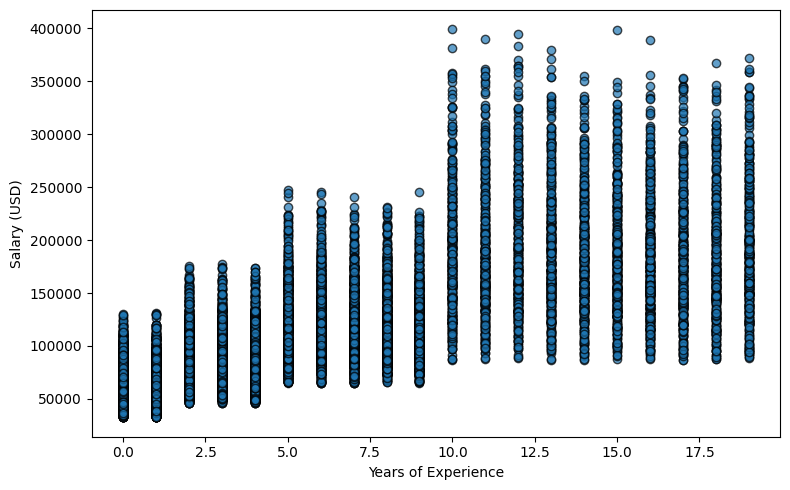

In [23]:
# Basic scatter plot for AI job data
# This graph intentionally leaves out several accessibility features for LLM testing purposes:
# ❌ No title
# ❌ No font size customization for labels or ticks
# ❌ No color contrast specification
# ✅ Complies with minimum size requirement

plt.figure(figsize=(8, 5))

plt.scatter(
    df_clean["years_experience"],
    df_clean["salary_usd"],
    alpha=0.7,
    edgecolor="k"
)

plt.xlabel("Years of Experience")
plt.ylabel("Salary (USD)")

plt.tight_layout()
plt.show()

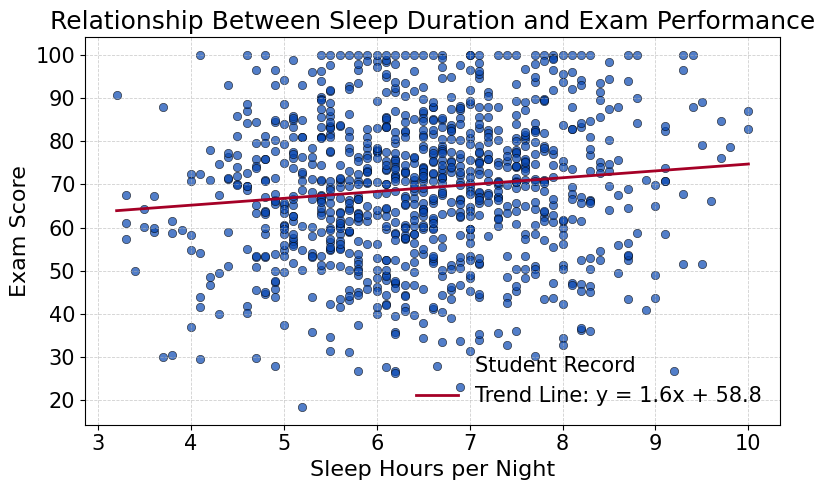

In [24]:
# Scatter plot for student sleep vs. exam score
# This graph fully complies with all accessibility rules

plt.figure(figsize=(8, 5))  # ✅ Minimum figure size for readability

plt.scatter(
    df1_clean["sleep_hours"],
    df1_clean["exam_score"],
    alpha=0.7,
    color="#0948B3",  # ✅ High contrast (≈ 9:1)
    edgecolor="black",
    linewidth=0.5,
    label="Student Record"
)

# ✅ Trend line included for interpretability
m, b = np.polyfit(df1_clean["sleep_hours"], df1_clean["exam_score"], 1)
xs = np.linspace(df1_clean["sleep_hours"].min(), df1_clean["sleep_hours"].max(), 100)
plt.plot(
    xs,
    m * xs + b,
    color="#A50026",  # ✅ High contrast trend line
    linewidth=2,
    label=f"Trend Line: y = {m:.1f}x + {b:.1f}"
)

# ✅ Descriptive title and axis labels with font sizes ≥ 15 pt
plt.title("Relationship Between Sleep Duration and Exam Performance", fontsize=18)
plt.xlabel("Sleep Hours per Night", fontsize=16)
plt.ylabel("Exam Score", fontsize=16)

# ✅ Tick label font sizes for readability
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# ✅ Legend for clarity
plt.legend(fontsize=15, frameon=False)

# ✅ Grid improves visual parsing
plt.grid(True, linestyle="--", linewidth=0.6, alpha=0.6)

plt.tight_layout()
plt.show()